In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('customerchurn.txt')

In [65]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
df.shape

(10000, 14)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [68]:
df.drop(['RowNumber' , "Surname" , 'CustomerId'], axis = 1 , inplace=True)

In [69]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
df_num = df[['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'NumOfProducts' , 'EstimatedSalary']]

In [71]:
df_cat = df[['Geography', 'Gender' , 'HasCrCard' , 'IsActiveMember' , 'Exited']]

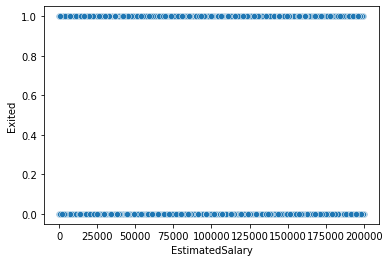

In [72]:
sns.scatterplot(x = 'EstimatedSalary' , y = "Exited" , data = df)

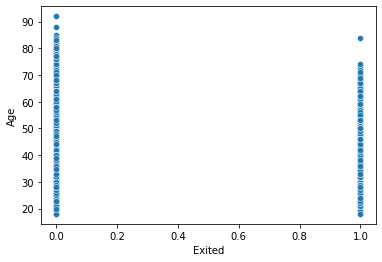

In [73]:
sns.scatterplot(x = 'Exited' , y = "Age" , data = df)


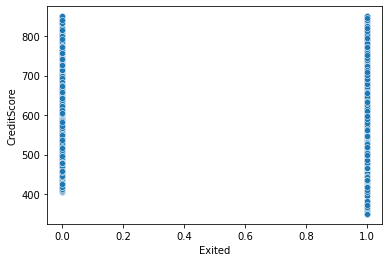

In [74]:
sns.scatterplot(x = 'Exited' , y = "CreditScore" , data = df)


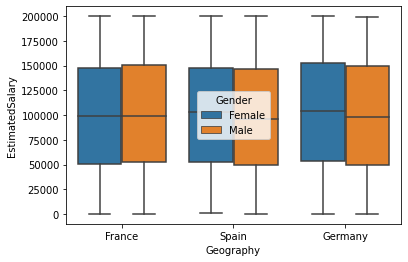

In [75]:
sns.boxplot(x= 'Geography' , y = 'EstimatedSalary' , data = df , hue = 'Gender')

The Estimated Salary is same among the three countries and between gender

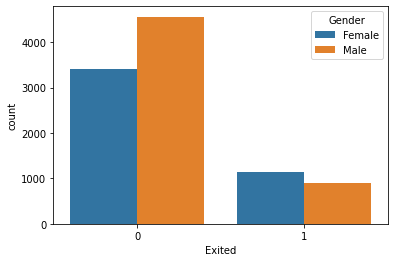

In [76]:
sns.countplot(x = 'Exited' , data = df , hue = 'Gender')

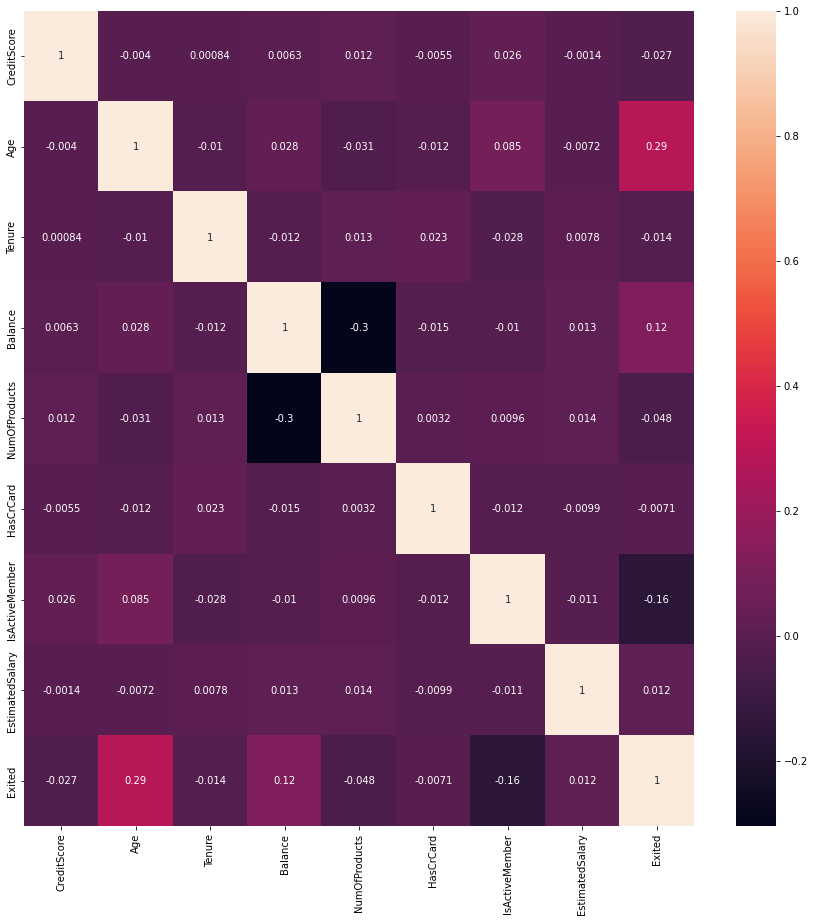

In [77]:
correlations = df.corr()
f , ax = plt.subplots(figsize = (15 ,15))
sns.heatmap(correlations , annot = True)

In [78]:
X = df.drop('Exited' , axis = 1)

In [79]:
y = df['Exited']

## Encoding 

In [80]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [81]:
le.fit(X['Geography'])
X['Geography'] = le.transform(X["Geography"])

In [82]:
le.fit(X.Gender)
X.Gender = le.transform(X.Gender)

In [83]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 0 )

###Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

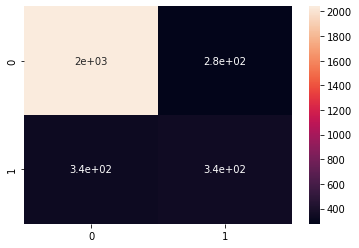

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(dt_pred , y_test)

sns.heatmap(cm , annot = True)

In [86]:
print(classification_report(y_test , dt_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2379
           1       0.51      0.56      0.53       621

    accuracy                           0.80      3000
   macro avg       0.69      0.71      0.70      3000
weighted avg       0.80      0.80      0.80      3000



### Random Forest 

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

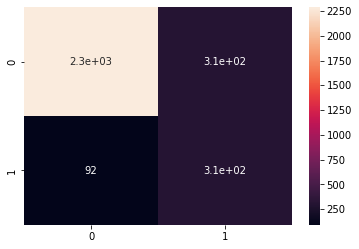

In [88]:
cm = confusion_matrix(rf_pred , y_test)

sns.heatmap(cm , annot = True)

In [89]:
print(classification_report(rf_pred , y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2601
           1       0.49      0.77      0.60       399

    accuracy                           0.86      3000
   macro avg       0.73      0.82      0.76      3000
weighted avg       0.90      0.86      0.88      3000

